In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('C:/Users/anjali suryawanshi/Desktop/customer_info.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#check missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data Cleaning & Preprocessing

In [7]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
## fill the gender column with mode of the value
data['Gender']=data['Gender'].fillna('Male')

In [9]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
data['Married']=data['Married'].fillna('Yes')

In [12]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
data['Dependents']= data['Dependents'].fillna('0')

In [15]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
data['Self_Employed']=data['Self_Employed'].fillna('No')

In [17]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [18]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(360)

In [21]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [22]:
data['Credit_History']= data['Credit_History'].fillna(1.0)

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1.0,Urban,Y


In [24]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,0.855049
std,6109.041673,2926.248369,84.037468,0.352339
min,150.000000,0.000000,9.000000,0.000000
25%,2877.500000,0.000000,100.250000,1.000000
50%,3812.500000,1188.500000,129.000000,1.000000
75%,5795.000000,2297.250000,164.750000,1.000000
max,81000.000000,41667.000000,700.000000,1.000000


## Explorartory data analysis

##### We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [27]:
# frequency table of a variable will give us the count of each category in that variable
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [29]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\anjali suryawanshi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


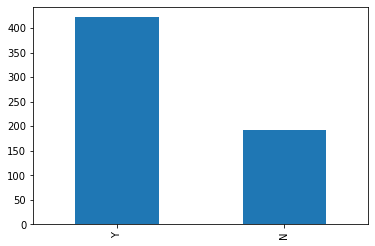

In [33]:
# bar plot to visualize the frequency
data['Loan_Status'].value_counts().plot.bar()

###  Independent variable

###### There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

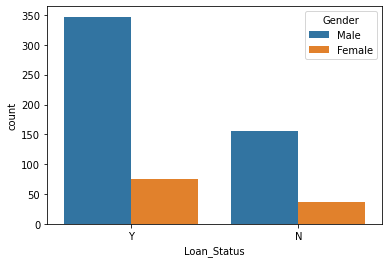

In [51]:
sns.countplot(x='Loan_Status',hue='Gender',data=data)



From the bar charts above, it can be inferred that:
proportion of male and female applicants is more or less same for both approved and unapproved loans


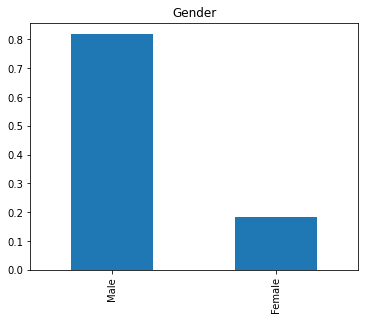

In [42]:
## In normalize form
plt.subplot(231)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')


###### It can be inferred from the above normalize bar plots that:
80% applicants in the dataset are male.

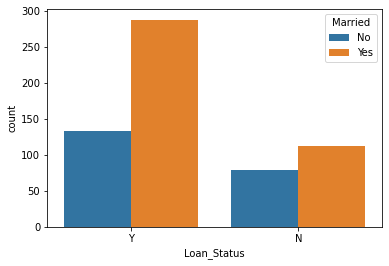

In [50]:
#explore the married status
sns.countplot(x='Loan_Status',hue='Married',data=data)

From the bar charts above, it can be inferred that:
proportion of married applicants is higher for the approved loans


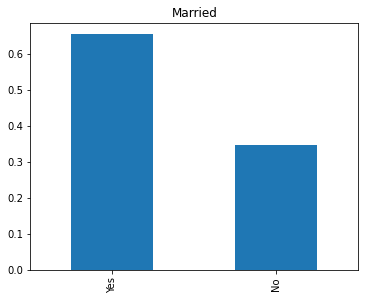

In [45]:
## in normalize form
plt.subplot(231)
data['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Married')

###### It can be inferred from the above normalize bar plots that:
Around 65% of the applicants in the dataset are married.


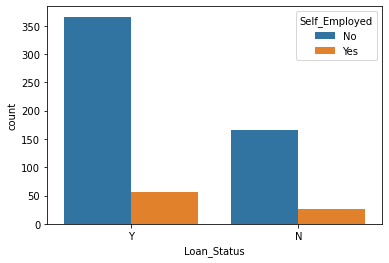

In [49]:
#explore the self employed
sns.countplot(x='Loan_Status',hue='Self_Employed',data=data)

From the bar charts above, it can be inferred that:
there is nothing significant we can infer from Self_Employed vs Loan_Status plot.


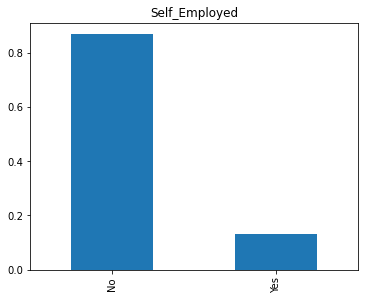

In [48]:
## In normalize form

plt.subplot(233)
data['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Self_Employed')

###### It can be inferred from the above normalize bar plots that:

Around 15% applicants in the dataset are self employed.


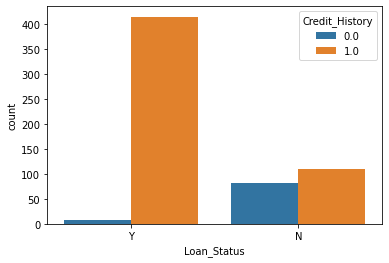

In [52]:
## explore the credit history
sns.countplot(x='Loan_Status',hue='Credit_History',data=data)

From the bar charts above, it can be inferred that:
it seems people with credit history as 1 are more likely to get their loans approved


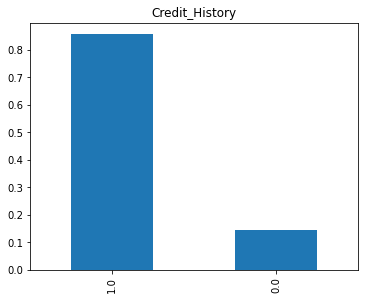

In [55]:
plt.subplot(234)
data['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Credit_History')

##### It can be inferred from the above normalize bar plots that:
Around 85% applicants have credit history (repaid their debts).


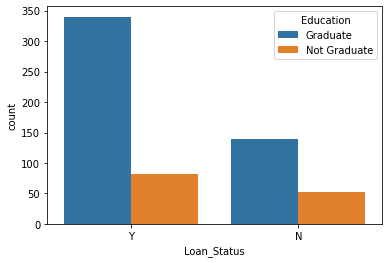

In [56]:
## explore the education
sns.countplot(x='Loan_Status',hue='Education',data=data)

From the bar charts above, it can be inferred that
proportion of loans getting approved for graduates is higher compared to non-graduates


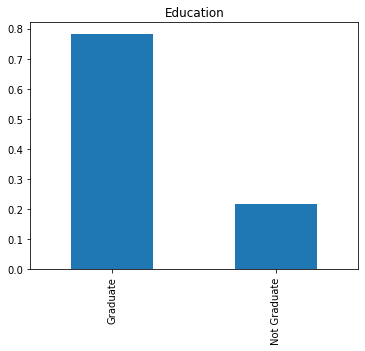

In [57]:
## In Normalize Form
plt.subplot(235)
data['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Education')
plt.show()

##### It can be inferred from the above normalize bar plots that:
Around 80% of the applicants are Graduate.

### Independent Variable(ordinal)

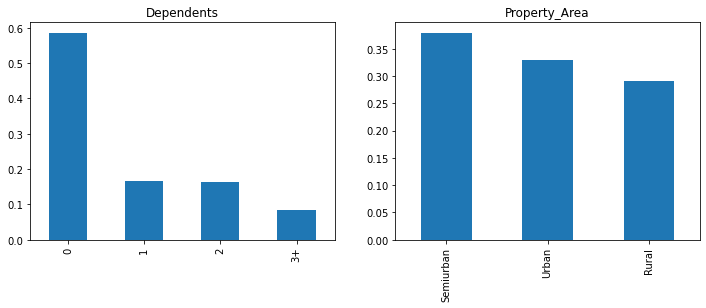

In [59]:

# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

######  Following inferences can be made from the above bar plots:
More than half of the applicants don’t have any dependents.
Most of the applicants are from Semiurban area.

### Independent Variable (Numerical)
There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Firstly, let’s look at the Applicant income distribution:

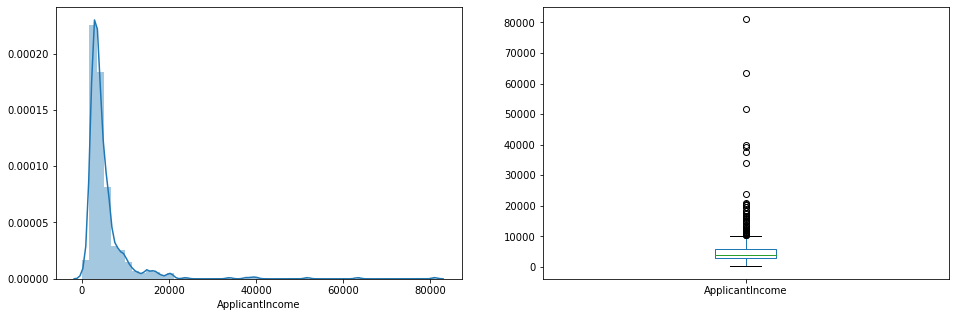

In [60]:

# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(data['ApplicantIncome']);

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

###### It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.
The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

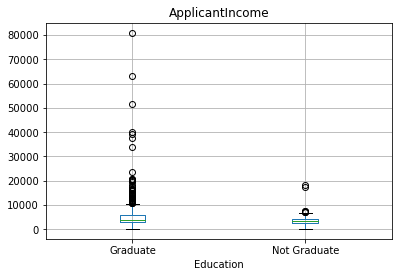

In [61]:

data.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

##### Secondly, Let’s look at the Coapplicant income distribution.

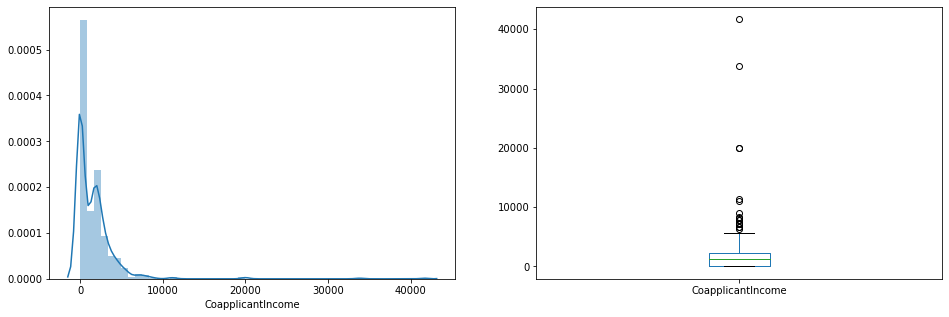

In [62]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(data['CoapplicantIncome']);

plt.subplot(122)
data['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

###### Thirdly, let’s look at the distribution of LoanAmount variable.

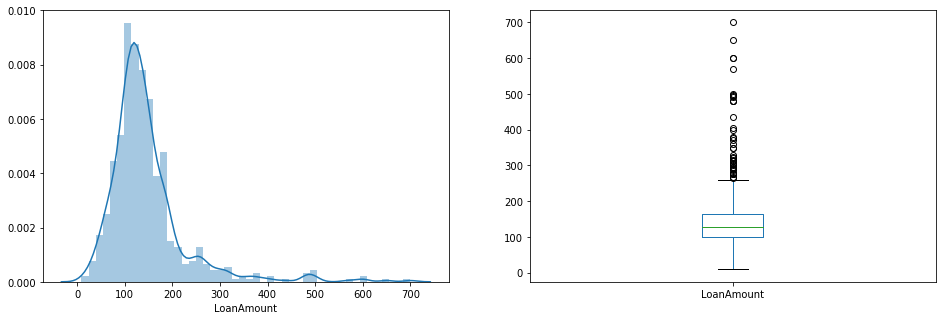

In [63]:
# plt.figure(1)
plt.subplot(121)
df=data.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))

plt.show()


We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections

###### Lastly, let’s look at the distribution of Loan_Amount_Term variable. Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

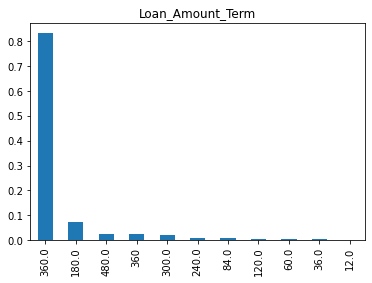

In [64]:

# plot bar chart
data['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

It can be inferred from the above bar plot that:

Around 85% of the loans are 360 months term or 30 years period

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,0.011134
LoanAmount,0.565620,0.187828,1.000000,-0.001431
Credit_History,-0.018615,0.011134,-0.001431,1.000000


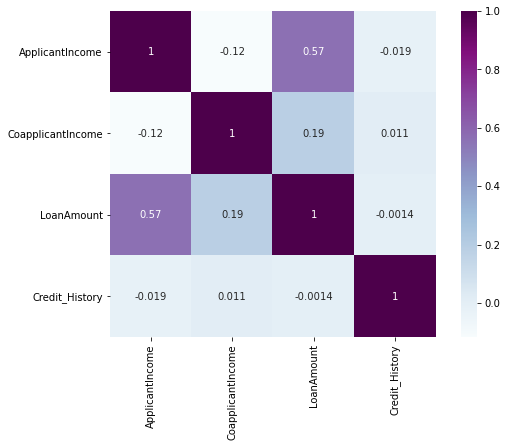

In [66]:
# calculate and visualize correlation matrix
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

We see that the most correlated variables are

1.(ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
2.LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19

### Outlier Treatment

Text(0.5, 1.0, 'Loan Amount')

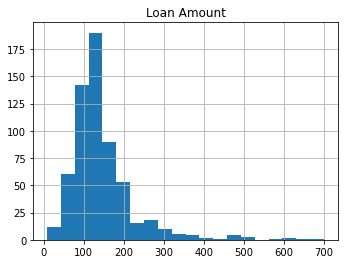

In [69]:
ax1 = plt.subplot(121)
data['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Loan Amount")

In [70]:
# Removing skewness in LoanAmount variable by log transformation
data['LoanAmount_log'] = np.log(data['LoanAmount'])

Text(0.5, 1.0, 'Loan Amount')

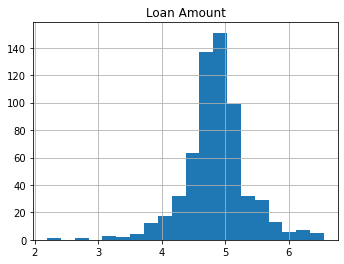

In [71]:
# after log transformation

ax1 = plt.subplot(121)
data['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Loan Amount")


Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1.0,Urban,Y,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1.0,Urban,Y,4.948760


### Model Prepration

Lets drop the Loan_ID variable as it do not have any effect on the loan status.

In [73]:
# drop Loan_ID 
data = data.drop('Loan_ID', axis=1)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the X variable.

In [74]:
# drop "Loan_Status" and assign it to target variable
X = data.drop('Loan_Status', 1)
y = data.Loan_Status


We can use pandas get_dummies function to convert categorical variable into dummy/indicator variables, it will only convert "object" type and will not affect numerical type.

In [75]:
# adding dummies to the dataset
X = pd.get_dummies(X)
data = pd.get_dummies(data)

In [76]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,1.0,4.986426,0,1,1,0,1,...,0,0,1,0,0,0,0,1,0,1
1,4583,1508.0,128.000000,1.0,4.852030,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,3000,0.0,66.000000,1.0,4.189655,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,1.0,4.787492,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,1
4,6000,0.0,141.000000,1.0,4.948760,0,1,1,0,1,...,0,0,1,0,0,0,0,1,0,1


We will use the train_test_split function from sklearn to divide our dataset. So, first let us import train_test_split.

In [77]:
# import library
from sklearn.model_selection import train_test_split

In [78]:

# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [79]:
# take a look at the dimension of the data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((429, 31), (185, 31), (429,), (185,))

The dataset has been divided into training and testing part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [80]:

# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [81]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\anjali suryawanshi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Let’s predict the Loan_Status for validation set and calculate its accuracy.



In [82]:
# make prediction
pred = model.predict(x_test)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [84]:

# calculate accuracy score
accuracy_score(y_test, pred)

0.8216216216216217

So our predictions are over 83% accurate, i.e. we have identified 82% of the loan status correctl

##### Let’s evaluate our model with the confusion matrix

[[ 22  29]
 [  4 130]]


Text(33.0, 0.5, 'True')

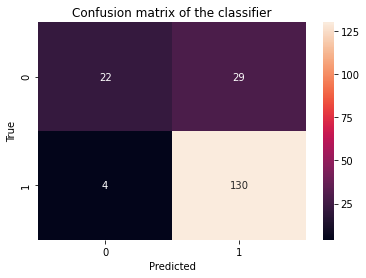

In [86]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [87]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.85      0.43      0.57        51
           Y       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185



The performance of our model seems encouraging, with accuracy of 82%, precision of 82% and recall of 97%.